<a href="https://colab.research.google.com/github/anuragiiser/Multi_Modal_IR/blob/main/CLIP_retrieval_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
! pip install git+https://github.com/openai/CLIP.git

In [ ]:
import torch
import torchvision
import clip
from PIL import Image
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!ls

drive  sample_data


In [ ]:
!unzip '/content/drive/MyDrive/Text_to_image/images.zip' -d 'images'

Streaming output truncated to the last 5000 lines.
  inflating: images/images/travel and  adventure/Places365_val_00009531.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009532.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009533.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009534.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009535.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009536.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009537.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009538.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009539.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009540.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009541.jpg  
  inflating: images/images/travel and  adventure/Places365_val_00009542.jpg  
  inflating: 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 111MiB/s]


In [ ]:
tokens = clip.tokenize('Dog playing football')

In [ ]:
food_images = []
travel_images = []
art = []
arch = []

food_img_root = 'images/images/food and d rinks'
travel_img_root = 'images/images/travel and  adventure'
art_img_root = 'images/images/art and culture'
arch_img_root = 'images/images/architecure'

for filename in os.listdir(food_img_root):
  food_images.append(os.path.join(food_img_root, filename))
for filename in os.listdir(travel_img_root):
  travel_images.append(os.path.join(travel_img_root, filename))
for filename in os.listdir(food_img_root):
  art.append(os.path.join(arch_img_root, filename))
for filename in os.listdir(travel_img_root):
  arch.append(os.path.join(arch_img_root, filename))

In [ ]:
print(len(food_images))
print(len(travel_images))
print(len(art))
print(len(arch))

8782
8800
8782
8800


In [ ]:
original_images = []
images = []
for i, filename in enumerate(food_images[:8500]+travel_images[:8500]):
  image = Image.open(filename).convert("RGB")
  original_images.append(image)
  images.append(preprocess(image))
  if i % 200 == 0:
      print('{}th images complete'.format(i))

0th images complete
200th images complete
400th images complete
600th images complete
800th images complete


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1000th images complete
1200th images complete
1400th images complete
1600th images complete
1800th images complete
2000th images complete
2200th images complete
2400th images complete
2600th images complete
2800th images complete
3000th images complete
3200th images complete
3400th images complete
3600th images complete
3800th images complete
4000th images complete
4200th images complete
4400th images complete
4600th images complete
4800th images complete
5000th images complete
5200th images complete
5400th images complete
5600th images complete
5800th images complete
6000th images complete
6200th images complete
6400th images complete
6600th images complete
6800th images complete
7000th images complete
7200th images complete
7400th images complete
7600th images complete
7800th images complete
8000th images complete
8200th images complete
8400th images complete
8600th images complete
8800th images complete
9000th images complete
9200th images complete
9400th images complete
9600th imag

In [ ]:
print(len(original_images))
print(len(images))

17000
17000


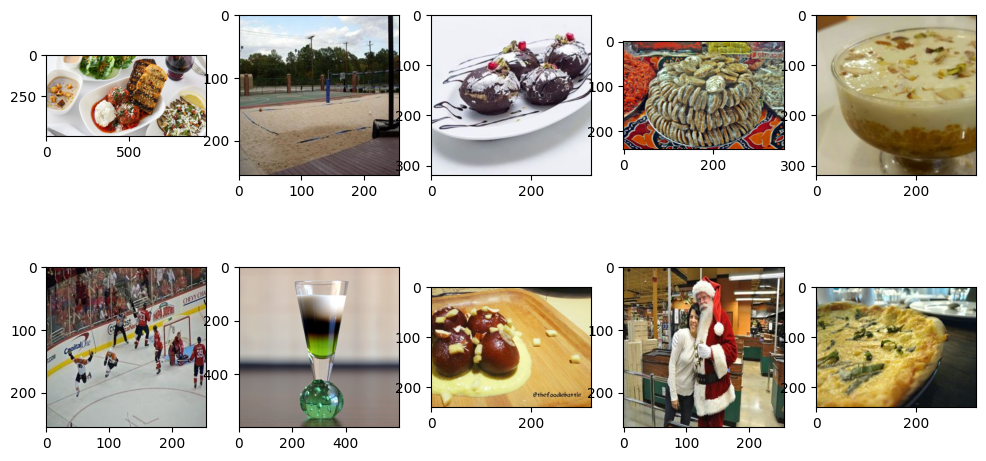

In [ ]:
fig = plt.figure(figsize = (12,6))
for i in range(10):
    idx = np.random.randint(0,16000)
    plt.subplot(2,5,i+1)
    plt.imshow(original_images[idx])

In [ ]:
class ImgRetrieval:
    def __init__(self, image_data, original_images, model):
        self.original_images = original_images
        self.model = model
        self.img_vecs = []
        for i in range(0,17000):
            with torch.no_grad():
                temp = image_data[i].reshape(1,3,224,224).cuda()
                img_vecs = model.encode_image(temp).float()
                temp = temp.to('cpu')
                self.img_vecs.append(img_vecs)
                torch.cuda.empty_cache()
            if i % 200 == 0:
                print('{}th encoding complete'.format(i))
        self.img_vecs = torch.vstack(self.img_vecs)
        self.img_vecs = self.img_vecs / self.img_vecs.norm(dim = -1, keepdim = True)

    def retrieve(self, text):
      text_vec = self.model.encode_text(clip.tokenize(text).cuda()).float()
      text_vec = text_vec / text_vec.norm(dim = -1, keepdim = True)
      #print(text_vec @ self.img_vecs.T)
      vec = text_vec @ self.img_vecs.T
      top_values, top_indices = torch.topk(vec.view(-1), k=10)
      #pick = torch.argmax(text_vec @ self.img_vecs.T)
      #return self.original_images[pick]
      return top_indices

In [ ]:
# initiate text to image retrieval engine
ret_machine = ImgRetrieval(images, original_images, model)

0th encoding complete
200th encoding complete
400th encoding complete
600th encoding complete
800th encoding complete
1000th encoding complete
1200th encoding complete
1400th encoding complete
1600th encoding complete
1800th encoding complete
2000th encoding complete
2200th encoding complete
2400th encoding complete
2600th encoding complete
2800th encoding complete
3000th encoding complete
3200th encoding complete
3400th encoding complete
3600th encoding complete
3800th encoding complete
4000th encoding complete
4200th encoding complete
4400th encoding complete
4600th encoding complete
4800th encoding complete
5000th encoding complete
5200th encoding complete
5400th encoding complete
5600th encoding complete
5800th encoding complete
6000th encoding complete
6200th encoding complete
6400th encoding complete
6600th encoding complete
6800th encoding complete
7000th encoding complete
7200th encoding complete
7400th encoding complete
7600th encoding complete
7800th encoding complete
8000th 

tensor([13142, 15334, 13194, 14235, 14805, 10889,  9554,  9607, 11598, 12942],
       device='cuda:0')


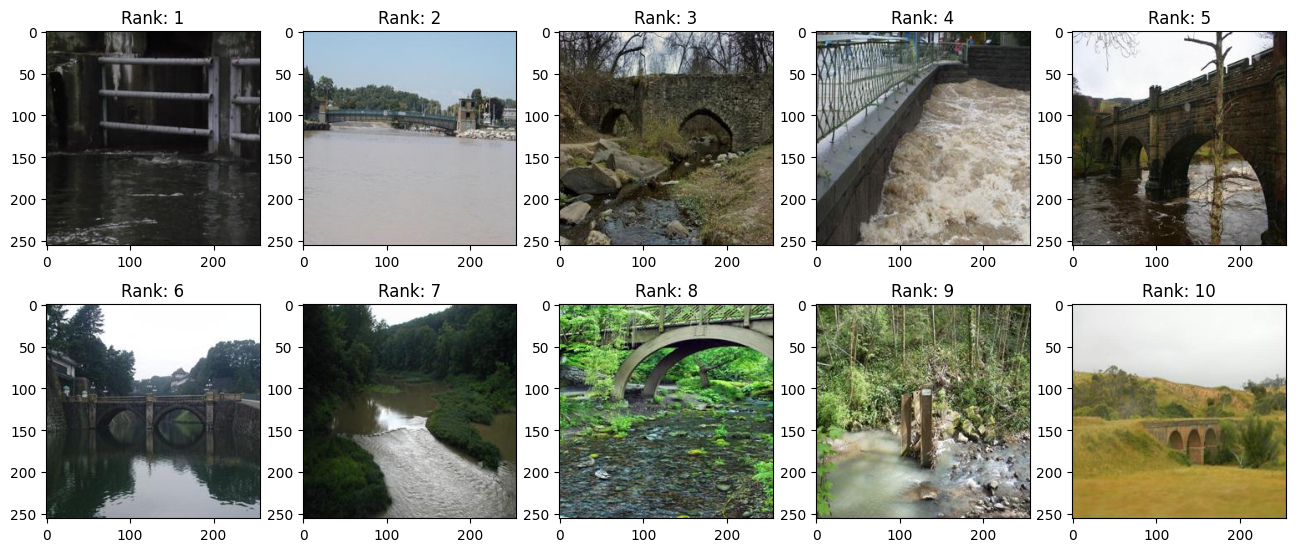

In [ ]:
text = "eggs with bread and butter"
p = ret_machine.retrieve(text)
print(p)
fig = plt.figure(figsize = (16,6.5))
for i, index in enumerate(p):
    img = original_images[index]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Rank: {i + 1}")

plt.show()

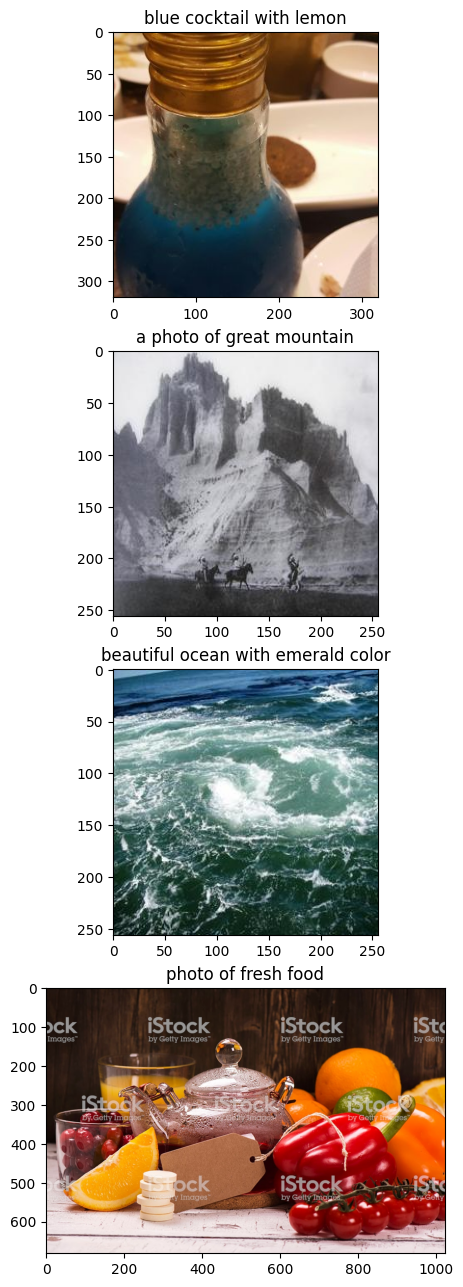

In [ ]:
testing_texts = ['blue cocktail with lemon',
                 'a photo of great mountain',
                 'beautiful ocean with emerald color',
                 'photo of fresh food']

fig = plt.figure(figsize = (10, 20))
for i, text in enumerate(testing_texts):
    p = ret_machine.retrieve(text)
    plt.subplot(5,1,i+1)
    plt.imshow(p)
    plt.title(text)